# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset and checking out:

In [3]:
house = pd.read_csv("C:/Users/rijul/Downloads/house_price.csv")
house.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [5]:
house.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [7]:
house.columns

Index(['Location', 'BHK', 'Furnishing', 'Sq.ft', 'Old(years)', 'Floor',
       'Price'],
      dtype='object')

# Exploring data analysis for house price prediction 

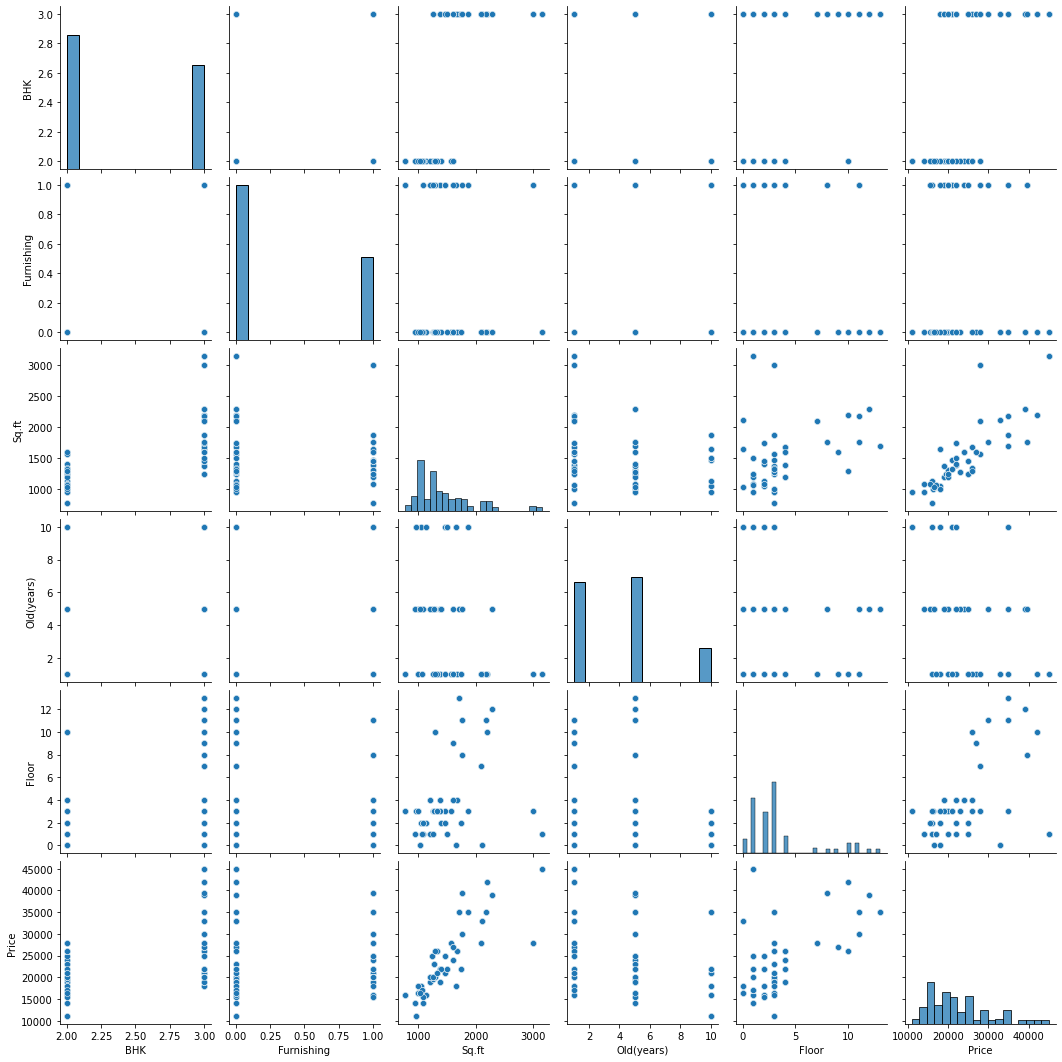

In [8]:
sns.pairplot(house)

C:\Users\rijul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

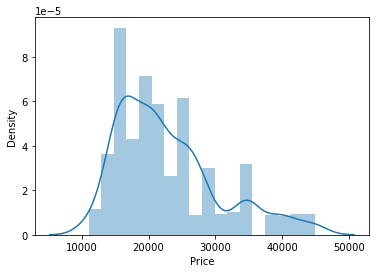

In [9]:
sns.distplot(house['Price'])

<AxesSubplot:>

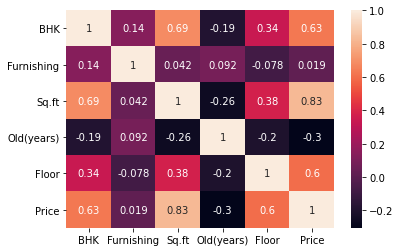

In [10]:
sns.heatmap(house.corr(), annot=True)

# Training a Linear Regression Model

In [30]:
X = house[['BHK','Furnishing','Sq.ft','Old(years)','Floor']]
y = house['Price']

# Splitting the data into Train , Test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

# Creating and Training the Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

# LinearRegression Model Evaluation

In [36]:
print(lr.intercept_)

4004.923534522488


In [37]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
BHK,1095.750786
Furnishing,144.410234
Sq.ft,9.665608
Old(years),-167.396288
Floor,778.606719


# Predictions from our LinearRegression Model

In [38]:
predictions = lr.predict(X_test)

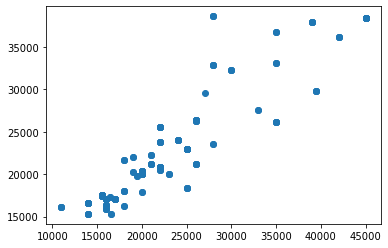

In [39]:
plt.scatter(y_test,predictions)

C:\Users\rijul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


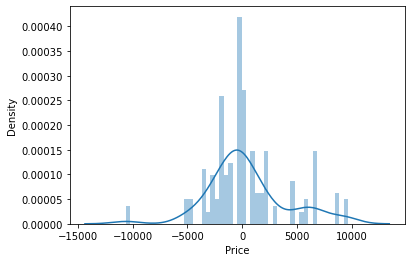

In [40]:
sns.distplot((y_test-predictions),bins=50);

# Regression Evaluation metrics

In [41]:
from sklearn import metrics

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))

MAE: 2524.1044674853824


In [43]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 13060831.09039862


In [44]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 3613.977184543176
